In [1]:
"""
Постройте классификатор для обучающего множества Glass, данные которого характеризуются 10-ю признаками:
1. Id number: 1 to 214; 
2. RI: показатель преломления; 
3. Na: сода (процент содержания в
соотвествующем оксиде); 
4. Mg; 
5. Al;
6. Si;
7. K;
8. Ca;
9. Ba;
10. Fe.


Классы характеризуют тип стекла:
(1) окна зданий, плавильная обработка
(2) окна зданий, не плавильная обработка
(3) автомобильные окна, плавильная обработка
(4) автомобильные окна, не плавильная обработка (нет в базе)
(5) контейнеры
(6) посуда
(7) фары

Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо
также удалить первый признак Id number, который не несет никакой информационной нагрузки.
Это выполняется командой glass <- glass[,-1].

Постройте графики зависимости ошибки классификации от значения k и от типа ядра.
Исследуйте, как тип метрики расстояния (параметр distance) влияет на точность классификации.
Определите, к какому типу стекла относится экземпляр с характеристиками
RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1
Определите, какой из признаков оказывает наименьшее влияние на определение класса путем
последовательного исключения каждого признака. 
"""

'\nПостройте классификатор для обучающего множества Glass, данные которого характеризуются 10-ю признаками:\n1. Id number: 1 to 214; \n2. RI: показатель преломления; \n3. Na: сода (процент содержания в\nсоотвествующем оксиде); \n4. Mg; \n5. Al;\n6. Si;\n7. K;\n8. Ca;\n9. Ba;\n10. Fe.\n\n\nКлассы характеризуют тип стекла:\n(1) окна зданий, плавильная обработка\n(2) окна зданий, не плавильная обработка\n(3) автомобильные окна, плавильная обработка\n(4) автомобильные окна, не плавильная обработка (нет в базе)\n(5) контейнеры\n(6) посуда\n(7) фары\n\nПосмотрите заголовки признаков и классов. Перед построением классификатора необходимо\nтакже удалить первый признак Id number, который не несет никакой информационной нагрузки.\nЭто выполняется командой glass <- glass[,-1].\n\nПостройте графики зависимости ошибки классификации от значения k и от типа ядра.\nИсследуйте, как тип метрики расстояния (параметр distance) влияет на точность классификации.\nОпределите, к какому типу стекла относится э

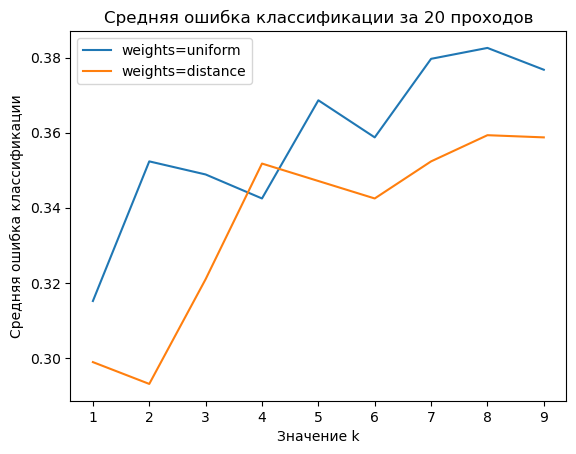

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 

# Загрузка данных и удаление первого столбца "Id number"
glass_data = pd.read_csv('glass.csv')

# Определение признаков (X) и классов (y)
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

# Список значений k, которые мы хотим исследовать
k_values = range(1, 10)

# Список типов весов, которые мы хотим исследовать
weight_types = ['uniform', 'distance']

# Словарь для хранения результатов
results = {'uniform': [], 'distance': []}

for weight_type in weight_types:
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        # Создание модели k-NN с заданным значением k и типом весов
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight_type)
        
        # Обучение модели
        knn.fit(X_train, y_train)
        
        # Предсказание классов на тестовой выборке
        knn.predict(X_test)
        
        # Вычисление ошибки классификации и сохранение ее в результаты
        error = 1 - knn.score(X_test, y_test)
        results[weight_type].append(error)

# Построение графиков
for weight_type in weight_types:
    plt.plot(k_values, results[weight_type], label=f'weights={weight_type}')

plt.xlabel('Значение k')
plt.ylabel('Ошибка классификации')
plt.title('Зависимость ошибки классификации от k и типа weights')
plt.legend()
plt.show()


In [20]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение классификатора k-NN
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

# Предсказание классов для тестовых данных
knn.predict(X_test)

# Оценка точности классификации
accuracy = knn.score(X_test,y_test)
print(f'Точность классификации: {accuracy}')

# Определение класса для нового экземпляра стекла
new_sample = np.array([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]])
predicted_class = knn.predict(new_sample)
print(f'Предсказанный класс для нового экземпляра: {predicted_class[0]}')

# Исследование влияния признаков на классификацию
feature_names = X.columns
accuracies = []

for feature in feature_names:
    reduced_X = X.drop(feature, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.3, random_state=42)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    accuracy = knn.score(X_test,y_test)
    print (feature ,accuracy)

Точность классификации: 0.7692307692307693
Предсказанный класс для нового экземпляра: 5
RI 0.7692307692307693
Na 0.7230769230769231
Mg 0.7076923076923077
Al 0.7076923076923077
Si 0.7076923076923077
K 0.7230769230769231
Ca 0.7384615384615385
Ba 0.7692307692307693
Fe 0.7538461538461538


C:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
